# Chapter 15: Q-Learning with Continuous States

New versions of MAC iOS doesn't support OpenGL, which means we need a workaround whenever the OpenAI Gym creates a game window. If you are using MAC, you can use this notebook for Chapter 15. 

Important: download https://gattonweb.uky.edu/faculty/lium/mla/mountain_car.p and place the file in this folder (Desktop/mal/MAC/). 

Also download MountainCarUtil.py from the book's GitHub repo and place in this folder. 

In [1]:
import os

os.makedirs("files/ch15", exist_ok=True)

# 15.1. The Mountain Car Game Environment

## 15.1.1. The Mountain Car Game


In [2]:
import gym
env = gym.make('MountainCar-v0')

# check the action space
number_actions = env.action_space.n
print("the number of possible actions are", number_actions)
# sample the action space ten times
print("the following are ten sample actions")
for i in range(10):
   print(env.action_space.sample())
# check the shape of the observation space
print("the shape of the observation space is",\
 env.observation_space.shape)    

the number of possible actions are 3
the following are ten sample actions
0
0
0
0
0
2
1
0
1
1
the shape of the observation space is (2,)


C:\Users\mark\.conda\envs\rep\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


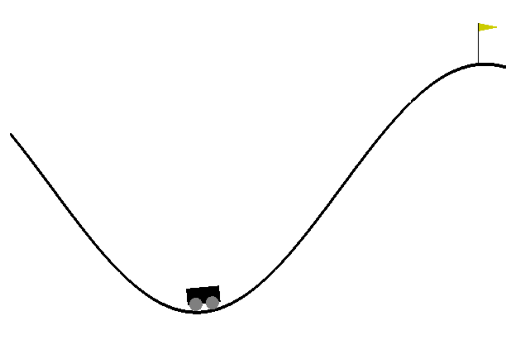

In [3]:
#download https://gattonweb.uky.edu/faculty/lium/mla/mountain_car.p 
#and place the file in this folder (Desktop/mal/MAC/). 
from MountainCarUtil import get_frame
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gym

env = gym.make("MountainCar-v0")
obs = env.reset()
for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    clear_output(wait=True)
    plt.imshow(get_frame(obs))
    plt.axis("off")
    plt.show()  
env.close()    

## 15.1.2. Convert A Continuous State into Discrete Values


In [4]:
obs = env.reset()
# print out the state
print(obs)
action = env.action_space.sample()
# print the new state
obs, reward, done, info = env.step(action)
print(obs)  

[-0.48779674  0.        ]
[-4.88064736e-01 -2.67999318e-04]


In [5]:
def obs_to_state(obs):
    state = [int(obs[0]*100)+125, int(obs[1]*1000)+75]
    return state

for i in range(10):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    state = obs_to_state(obs)
    print(state)

[77, 74]
[76, 73]
[76, 73]
[76, 72]
[75, 71]
[75, 72]
[75, 73]
[74, 72]
[74, 71]
[73, 70]


## 15.1.3. The Reward Structure of the Game

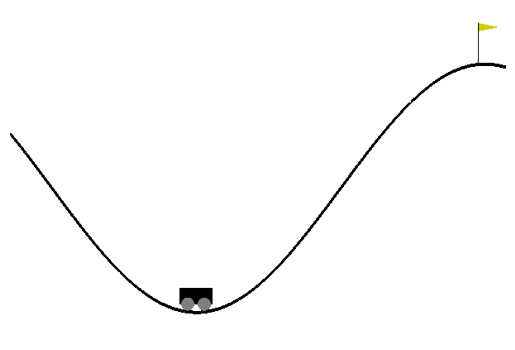

(1, [74, 74], -1.0, False, {})
(2, [74, 75], -1.0, False, {})
(3, [74, 75], -1.0, False, {})
(4, [74, 75], -1.0, False, {})
(5, [74, 75], -1.0, False, {})
(6, [74, 75], -1.0, False, {})
(7, [74, 75], -1.0, False, {})
(8, [74, 75], -1.0, False, {})
(9, [74, 75], -1.0, False, {})
(10, [74, 75], -1.0, False, {})
(11, [74, 75], -1.0, False, {})
(12, [74, 73], -1.0, False, {})
(13, [74, 73], -1.0, False, {})
(14, [73, 72], -1.0, False, {})
(15, [73, 71], -1.0, False, {})
(16, [73, 72], -1.0, False, {})
(17, [72, 71], -1.0, False, {})
(18, [72, 71], -1.0, False, {})
(19, [71, 71], -1.0, False, {})
(20, [71, 72], -1.0, False, {})
(21, [71, 73], -1.0, False, {})
(22, [71, 74], -1.0, False, {})
(23, [70, 74], -1.0, False, {})
(24, [70, 75], -1.0, False, {})
(25, [70, 75], -1.0, False, {})
(26, [70, 74], -1.0, False, {})
(27, [70, 73], -1.0, False, {})
(28, [70, 74], -1.0, False, {})
(29, [70, 74], -1.0, False, {})
(30, [69, 73], -1.0, False, {})
(31, [69, 74], -1.0, False, {})
(32, [69, 75], -1

In [6]:
obs = env.reset()
episode = 0
results = []
while True:
    episode += 1 
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    state = obs_to_state(obs)
    results.append((episode, state, reward, done, info))
    clear_output(wait=True)
    plt.imshow(get_frame(obs))
    plt.axis("off")
    plt.show()
    # play till a full episode is finished
    if done:
        break
env.close()
for x in results:
    print(x)

# 15.2. Q-Learning in the Mountain Car Game



## 15.2.1. How to Train the Q-Table


In [7]:
import numpy as np

learning_rate=0.2
discount_rate=0.99
max_exp=0.9
min_exp=0.01
max_episode=100000
max_steps=200
Q=np.zeros((190, 150, 3))

## 15.2.2. Update the Q-Table 


In [8]:
def update_Q(episode): 
    obs=env.reset()   
    epsilon=min_exp+(max_exp-min_exp)*episode/max_episode
    # Play a full game till it ends
    for _ in range(max_steps):
        state = obs_to_state(obs)
        # Exploitation
        if epsilon<np.random.uniform(0,1,1):
            action=np.argmax(Q[state[0], state[1], :])
        # Exploration  
        else:
            action=env.action_space.sample()
        # Use the selected action to make a move
        new_obs,reward,done,info=env.step(action)
        new_state=obs_to_state(new_obs)
        # Update Q values
        if done==True:
            if new_obs[0]>=0.5:
                Q[state[0],state[1],action]=1
                outcome.append(1)
                break    
            else:
                outcome.append(0)
                break      
        else:
            Q[state[0],state[1],action]=learning_rate*\
 (reward+discount_rate*np.max(Q[new_state[0],new_state[1],:]))\
            +(1-learning_rate)*Q[state[0],state[1],action]
            obs=new_obs 
            continue

## 15.2.3. Train the Q-Table via Trial and Error


In [9]:
outcome=[]
for episode in range(max_episode):
    update_Q(episode)
    if episode%1000 == 0:
        print("this is episode", episode)

In [10]:
import pickle

with open('mountain_car_Qs.p','wb') as fp:
    pickle.dump((Q, outcome),fp)

In [11]:
import pickle
import numpy as np

# Load up the data
with open('mountain_car_Qs.p','rb') as fp:
    (Q, outcome)=pickle.load(fp)
# Print out information about the Q-table    
print("the shape of the Q-table is", Q.shape)
print("the size of the outcome list is", len(outcome))
# The mean value of the outcomes
print("the average value in the outcome list is",\
 np.mean(np.array(outcome)))

the shape of the Q-table is (190, 150, 3)
the size of the outcome list is 100000
the average value in the outcome list is 0.12124


# 15.3. Test the Trained Q-Table
 

## 15.3.1. Define the test_Q() function


In [12]:
def test_Q(rendering=False):
    obs=env.reset()   
    # Play a full game till it ends
    for i in range(1,201):
        state=obs_to_state(obs)
        # Select the best action from the Q-table
        action=np.argmax(Q[state[0], state[1], :])
        # Use the selected action to make a move
        obs, reward, done, info=env.step(action)
        if rendering==True:
            clear_output(wait=True)
            plt.imshow(get_frame(obs))
            plt.axis("off")
            plt.show()
        # Update Q values
        if done==True:
            if obs[0]>=0.5:
                print(f"congrats, you won in {i} steps!")
                result=1
            else:
                print("sorry, better luck next time")
                result=0
            break    
    return result

## 15.3.2. The Effectiveness of the Trained Q-Table

In [13]:
test_Q(rendering=True)

congrats, you won in 84 steps!


1

In [14]:
results=[]
for _ in range(10):
    result=test_Q(rendering=False)
    results.append(result)
print("the average score from the ten games is",\
 np.mean(np.array(results))) 

congrats, you won in 86 steps!
congrats, you won in 111 steps!
congrats, you won in 111 steps!
congrats, you won in 114 steps!
congrats, you won in 115 steps!
congrats, you won in 158 steps!
congrats, you won in 154 steps!
congrats, you won in 149 steps!
congrats, you won in 90 steps!
congrats, you won in 111 steps!
the average score from the ten games is 1.0


# 15.4. Animate the Game Before and After Q-Learning


## 15.4.1. The Mountain Car Game without Q-Learning


In [15]:
frames=[]
for _ in range(5):
    obs=env.reset()
    frames.append(get_frame(obs))
    while True:      
        action=env.action_space.sample()
        obs, reward, done, info=env.step(action)
        frames.append(get_frame(obs))
        if done:
            break

In [16]:
import imageio

frames4=[]
for frame in frames[::4]:
    frame4=frame.repeat(2,axis=0).repeat(2,axis=1)
    frames4.append(frame4)
imageio.mimsave('beforeQ.gif',frames4,duration=200)   

## 15.4.2. The Mountain Car Game with Q-Learning


In [17]:
Qframes=[]
for _ in range(10):
    obs=env.reset() 
    Qframes.append(get_frame(obs))
    while True:    
        state=obs_to_state(obs)
        # Select the best action 
        action=np.argmax(Q[state[0],state[1],:])        
        # Use the selected action to make a move
        obs,reward,done,info=env.step(action)
        Qframes.append(get_frame(obs))              
        if done:
            break

In [18]:
Qframes4=[]
for Qframe in Qframes[::4]:
    Qframe4=Qframe.repeat(2,axis=0).repeat(2,axis=1)
    Qframes4.append(Qframe4)
imageio.mimsave('afterQ.gif',Qframes4,duration=200)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/mountain_car_compares.gif" />

## 15.4.3. The Mountain Car Game wtih and without Q-learning


In [19]:
combined=[]
num_frames=min(len(frames4),len(Qframes4))
for i in range(num_frames):
    frame4=frames4[i]
    Qframe4=Qframes4[i]
    frame=np.concatenate([frame4, Qframe4],axis=1)
    combined.append(frame)
imageio.mimsave('mountain_car.gif',\
                combined, duration=200)

In [20]:
subplots=frames4[::30][:8] 

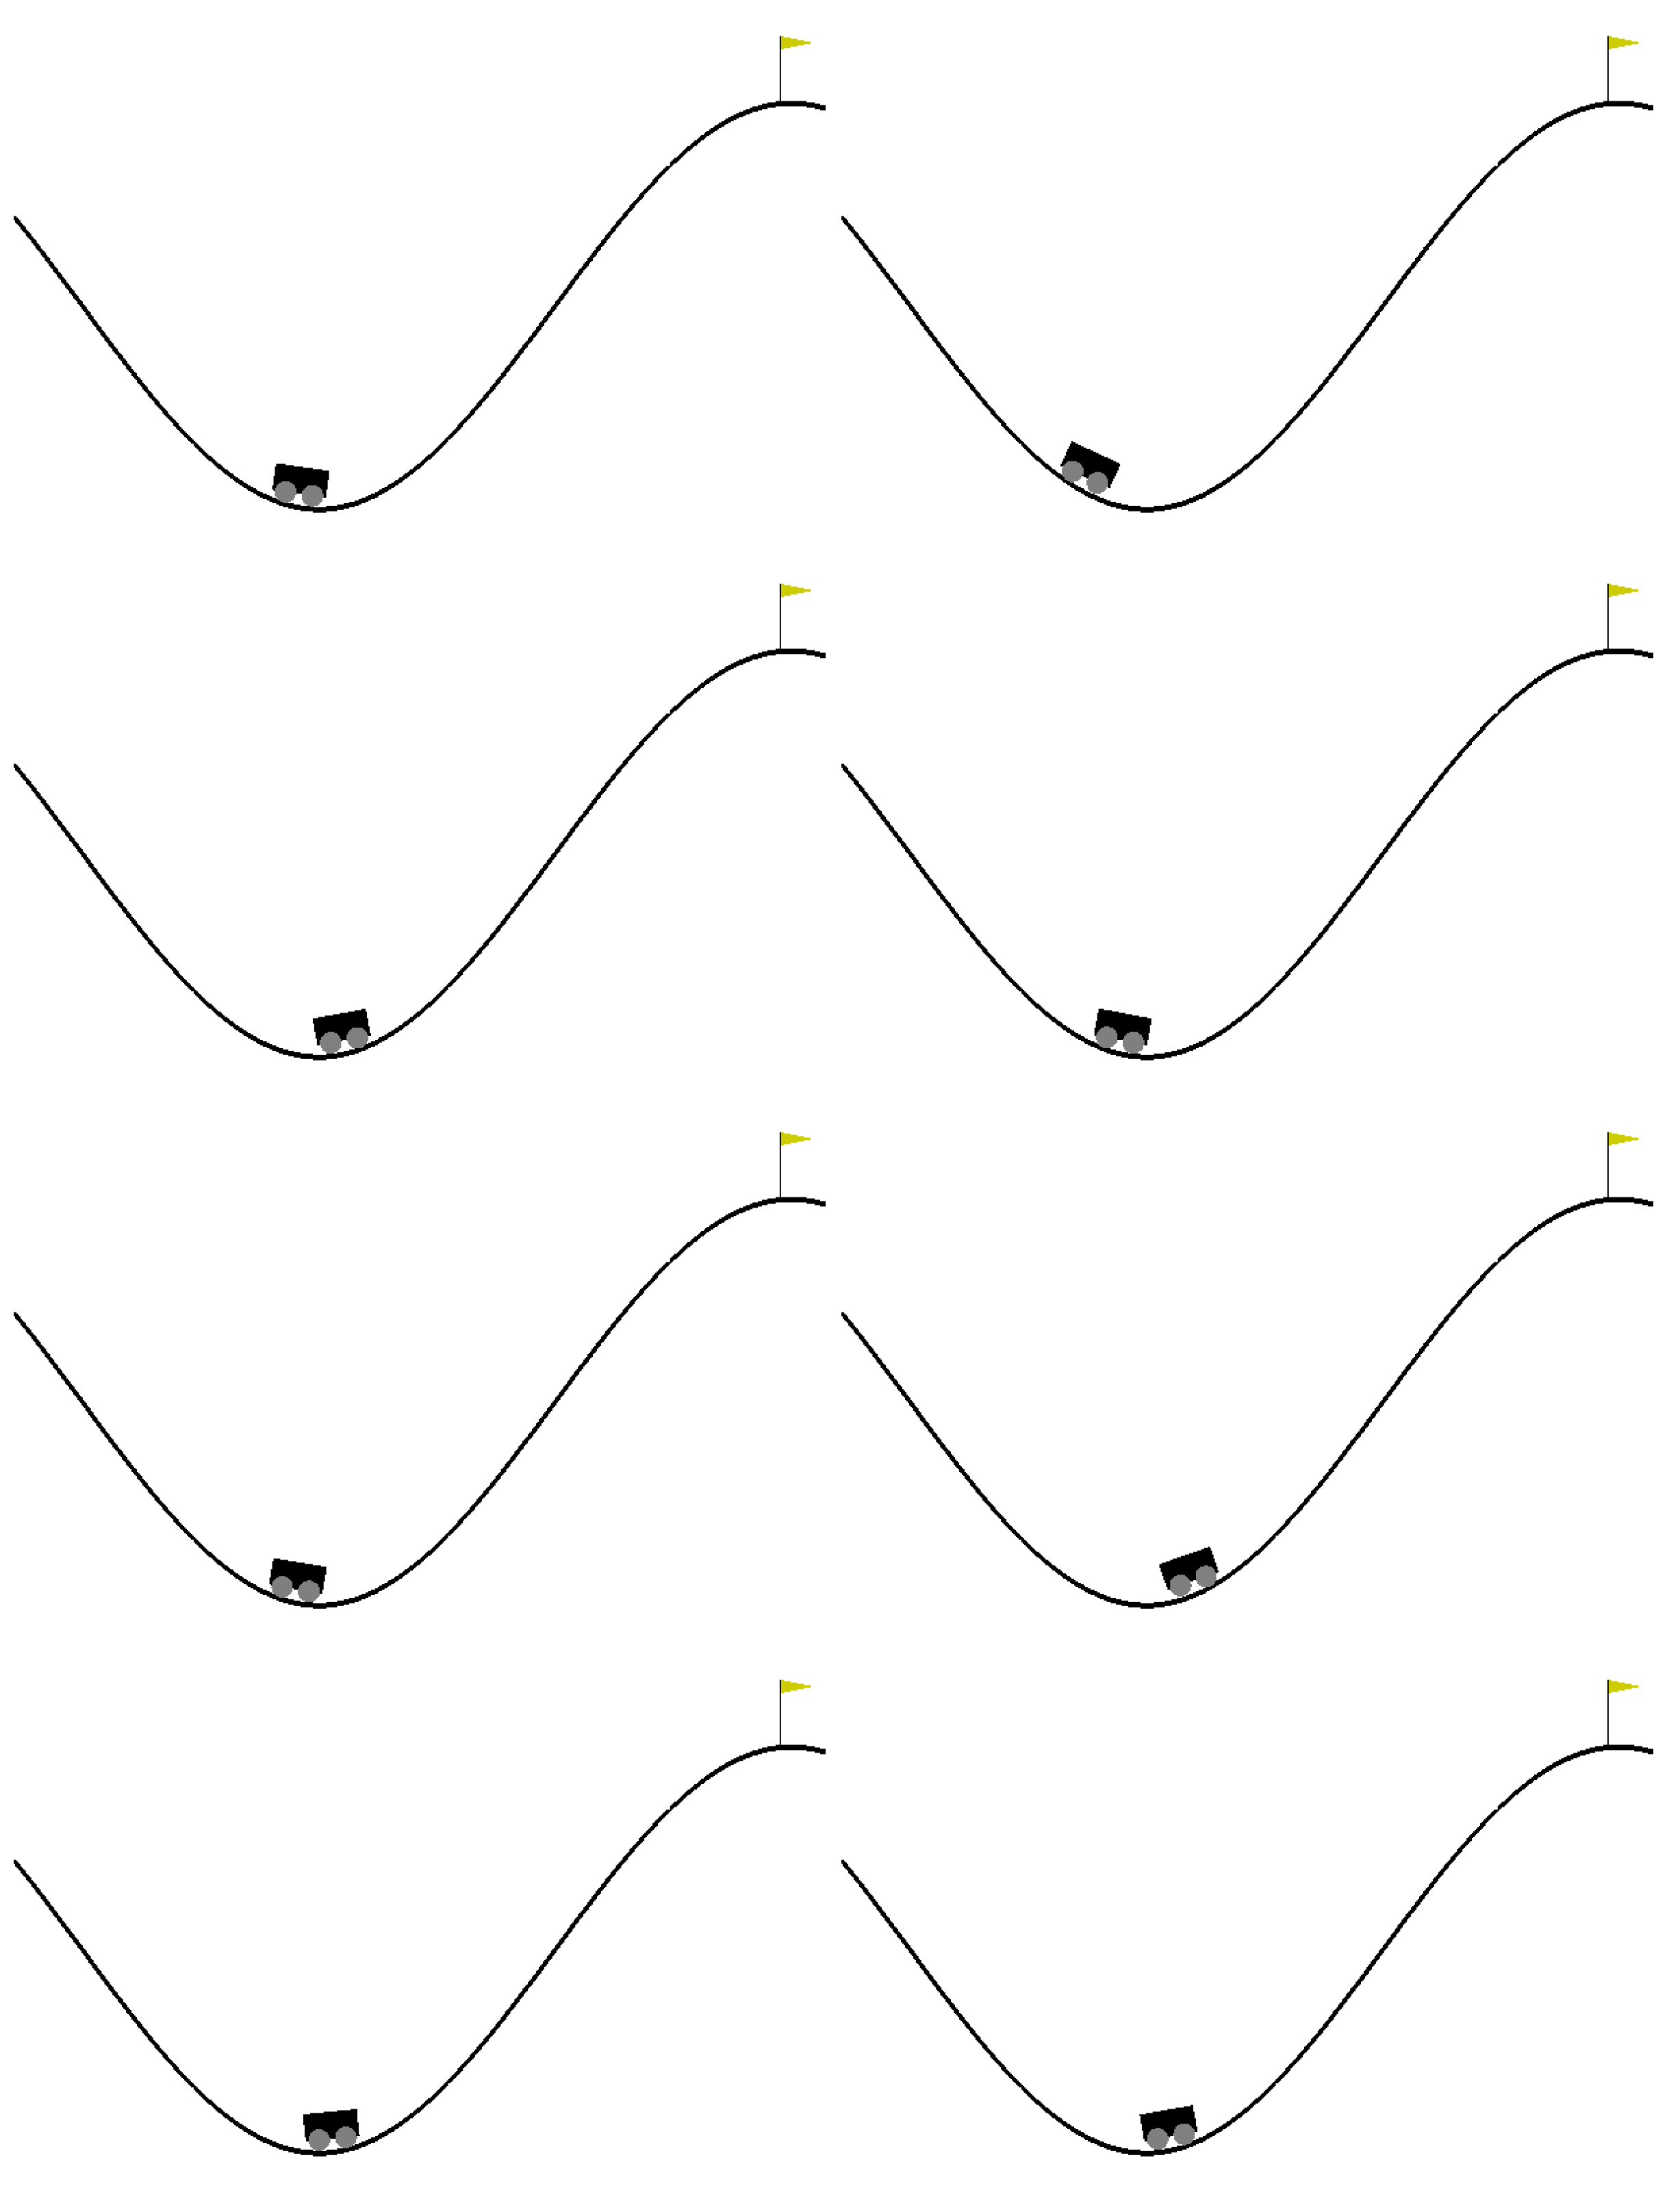

In [21]:
from matplotlib import pyplot as plt
    
plt.figure(figsize=(12,16),dpi=200)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.imshow(subplots[i])
    plt.axis('off')
plt.subplots_adjust(bottom=0.001,right=0.999,top=0.999,
        left=0.001, hspace=0.01,wspace=0.02)
plt.savefig("beforeQ.png")

In [22]:
Qsubplots=Qframes4[8::36][:8] 

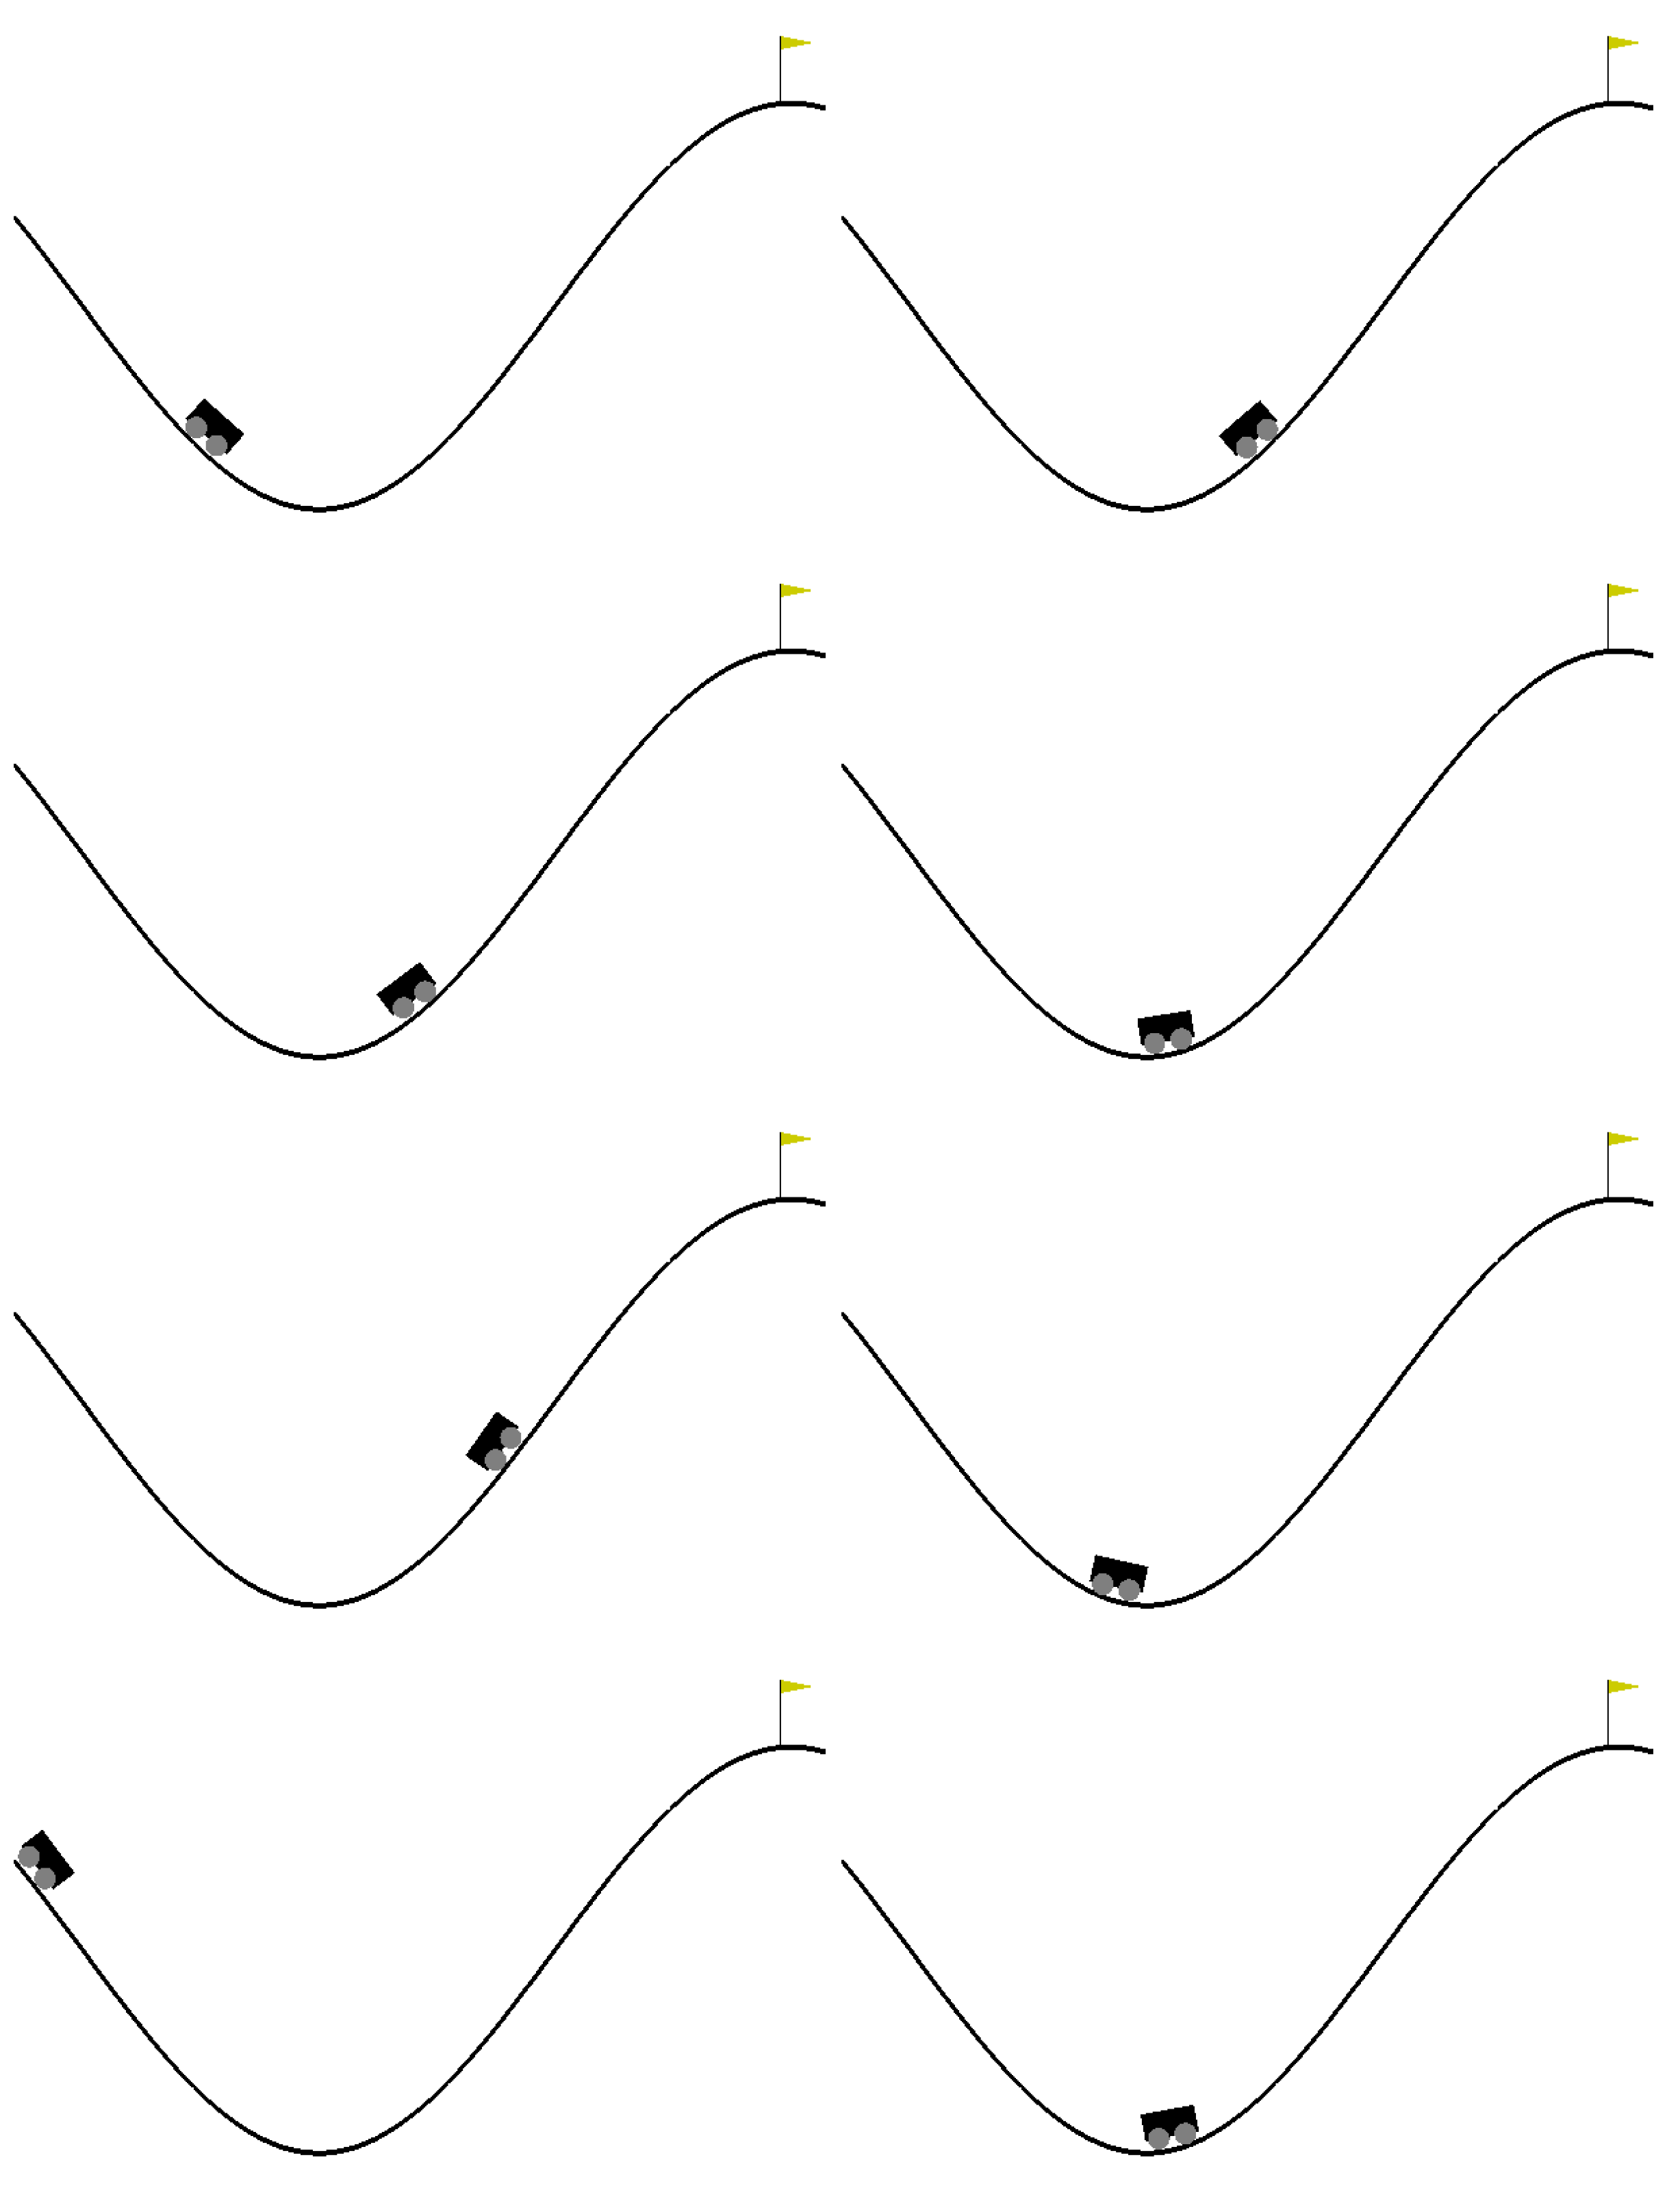

In [23]:
plt.figure(figsize=(12,16),dpi=200)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.imshow(Qsubplots[i])
    plt.axis('off')
plt.subplots_adjust(bottom=0.001,right=0.999,top=0.999,
        left=0.001, hspace=0.01,wspace=0.02)
plt.savefig("afterQ.png") 

# 15.6 Exercises

In [24]:
# answer to question 15.1
import time

obs = env.reset()
for i in range(200):
    action = i%3
    obs, reward, done, info = env.step(action)
    clear_output(wait=True)
    plt.imshow(get_frame(obs))
    plt.axis("off")
    plt.show()
time.sleep(5)
env.close()  

In [25]:
# answer to question 15.1
def new_test_Q(rendering=False):
    obs=env.reset()   
    # Play a full game till it ends
    for i in range(1,201):
        state=obs_to_state(obs)
        # Select the best action with 95% prob
        if np.random.rand(1)[0]<0.95:
            action=np.argmax(Q[state[0], state[1], :])
        else:
            action=env.action_space.sample()
        # Use the selected action to make a move
        obs, reward, done, info=env.step(action)
        if rendering==True:
            clear_output(wait=True)
            plt.imshow(get_frame(obs))
            plt.axis("off")
            plt.show()
        # Update Q values
        if done==True:
            if obs[0]>=0.5:
                print(f"congrats, you won in {i} steps!")
                result=1
            else:
                print("sorry, better luck next time")
                result=0
            break    
    return result

In [26]:
# answer to question 15.1
results=[]
for _ in range(10):
    result=new_test_Q(rendering=False)
    results.append(result)
print("the average score from the ten games is",\
 np.mean(np.array(results))) 

congrats, you won in 92 steps!
congrats, you won in 159 steps!
congrats, you won in 154 steps!
congrats, you won in 111 steps!
congrats, you won in 89 steps!
congrats, you won in 155 steps!
congrats, you won in 149 steps!
congrats, you won in 93 steps!
congrats, you won in 148 steps!
congrats, you won in 150 steps!
the average score from the ten games is 1.0
